# <ins> HeartRate Detection Algorithm </ins>

In [5]:
# Project imports
import sys
import os

# Add the parent directory to the system path
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

from HeartRateMeasurementAlgorithm import merge_ranges, detectMotion, generateValidPPGDataCSVFiles, measureHeartRate

CSV_FILE_NAME = '2023-05-01-001S-19-39-19-S'
CSV_FILE_EXT = '.csv'
CSV_FILE_PATH = CSV_FILE_NAME + CSV_FILE_EXT

### 1. Detect Motion Ranges in PPG CSV File

A_x_high_fluctuation_ranges:  [(2656, 2656), (9680, 9683)]
A_y_high_fluctuation_ranges:  [(2277, 2281), (9541, 9683)]
A_z_high_fluctuation_ranges:  [(2708, 2708), (9683, 9683)]
ppg_data_high_fluctuation_ranges:  [(9711, 9780)]
Motion Ranges:  [(2077, 2908), (9341, 9980)]


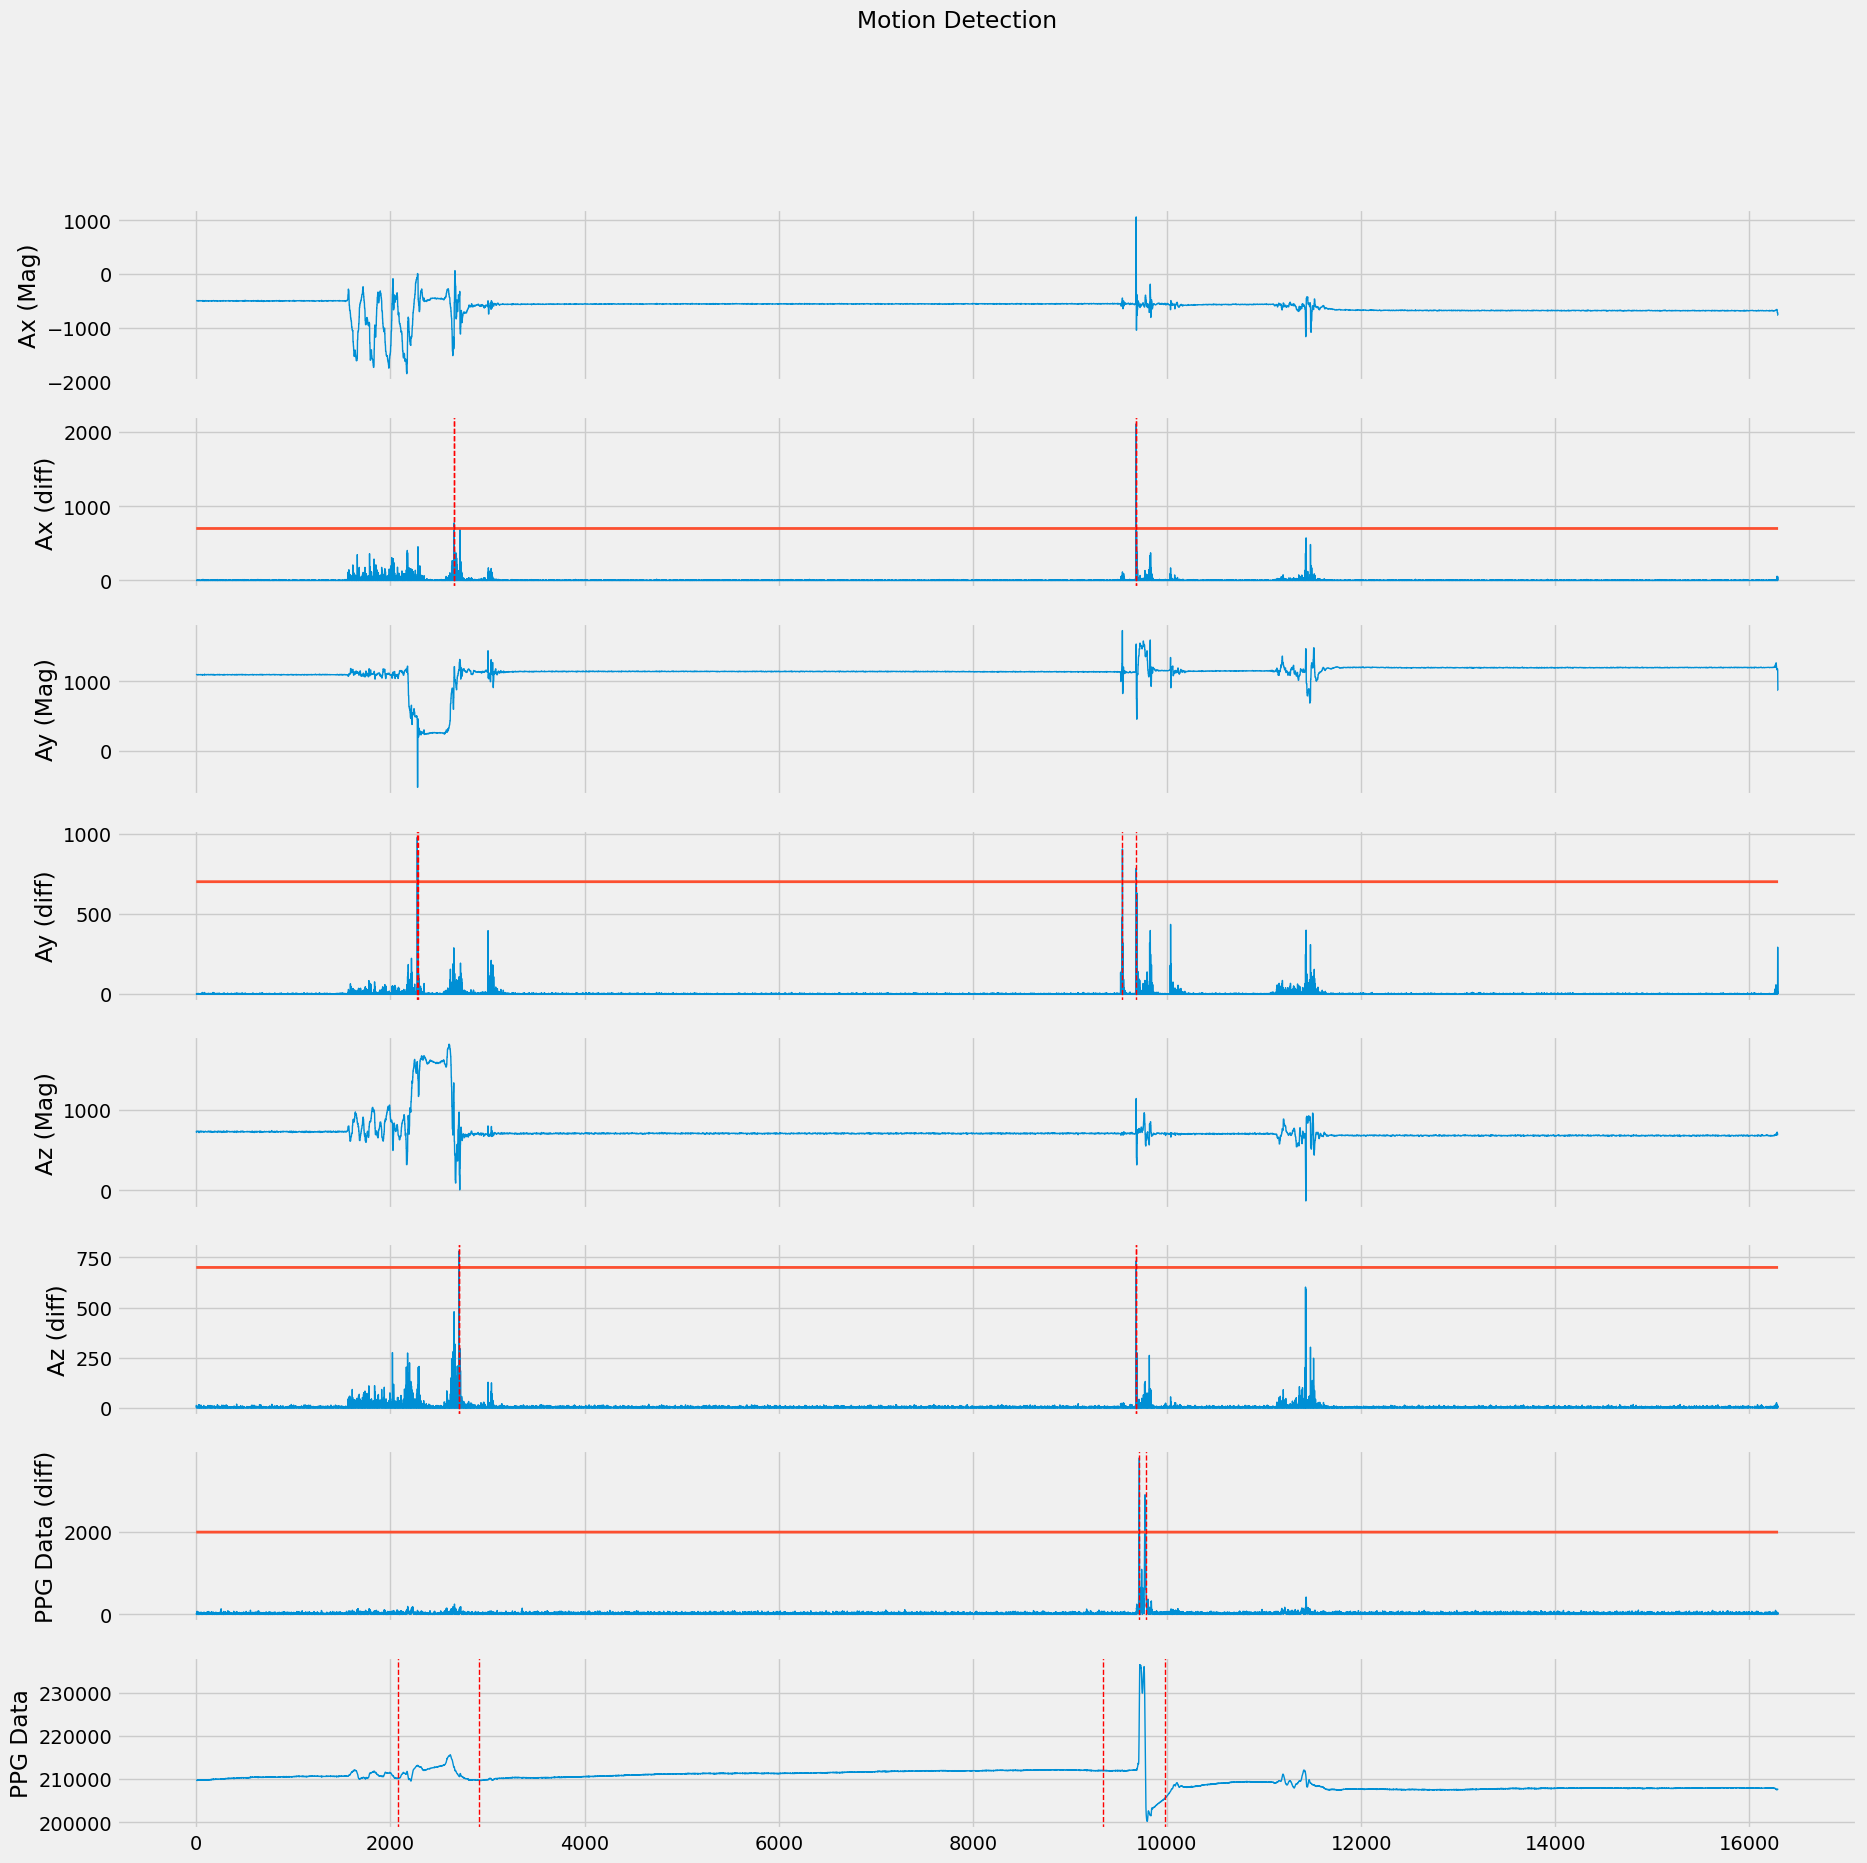

In [6]:

motionRanges = detectMotion(CSV_FILE_PATH)
print("Motion Ranges: ", motionRanges)

### 2. Slice CSV File Based on Motion Ranges

In [7]:
valid_csv_files = generateValidPPGDataCSVFiles(CSV_FILE_PATH, motionRanges, CSV_FILE_NAME)
print(valid_csv_files) 

Motion Ranges:  [(2077, 2908), (9341, 9980)]
No Motion Rages:  [(0, 2076), (2909, 9340), (9981, 16295)]
Range: (0, 2076) --> ValidCSVFiles/2023-05-01-001S-19-39-19-S-P0.csv
Range: (2909, 9340) --> ValidCSVFiles/2023-05-01-001S-19-39-19-S-P1.csv
Range: (9981, 16295) --> ValidCSVFiles/2023-05-01-001S-19-39-19-S-P2.csv
['ValidCSVFiles/2023-05-01-001S-19-39-19-S-P0.csv', 'ValidCSVFiles/2023-05-01-001S-19-39-19-S-P1.csv', 'ValidCSVFiles/2023-05-01-001S-19-39-19-S-P2.csv']


### 3. HeartRate Measurement  

ValidCSVFiles/2023-05-01-001S-19-39-19-S-P0.csv -> HeartRate: 69.3307655272027
ValidCSVFiles/2023-05-01-001S-19-39-19-S-P1.csv -> HeartRate: 76.49253731343285
ValidCSVFiles/2023-05-01-001S-19-39-19-S-P2.csv -> HeartRate: 72.20902612826603


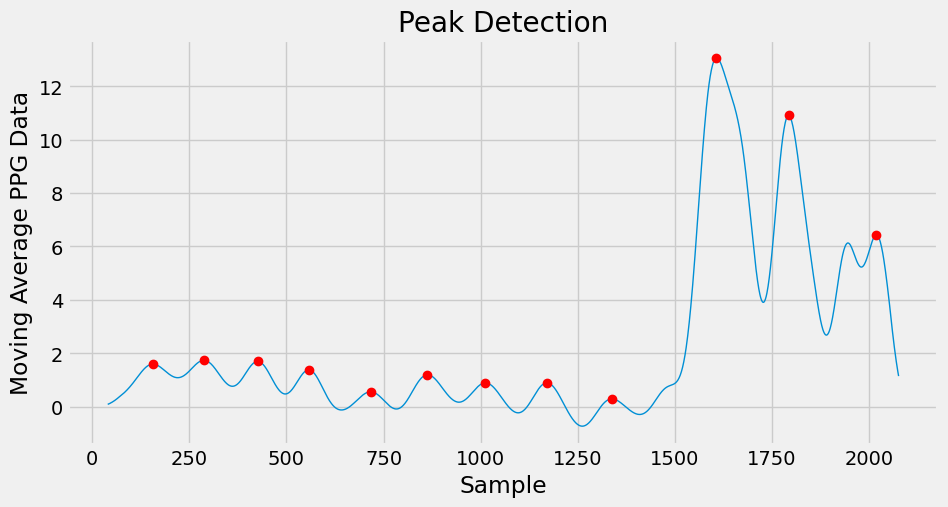

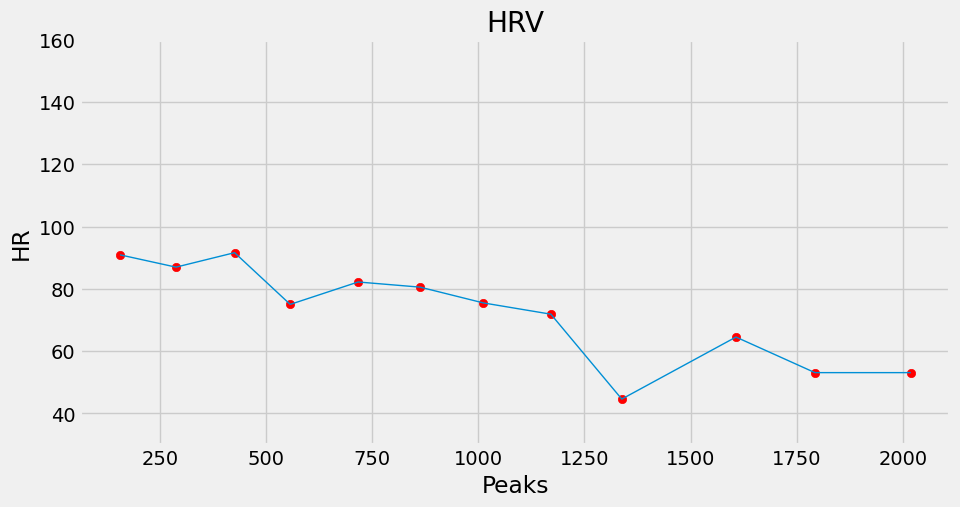

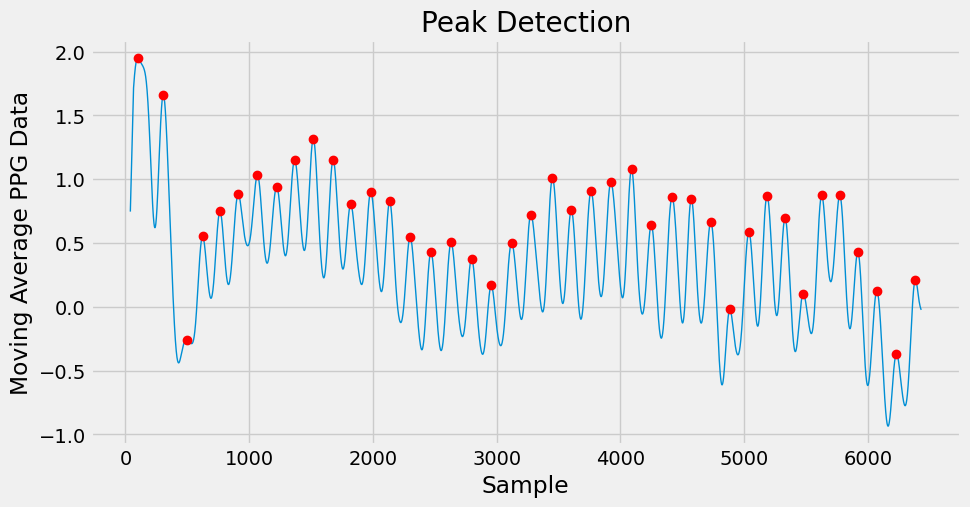

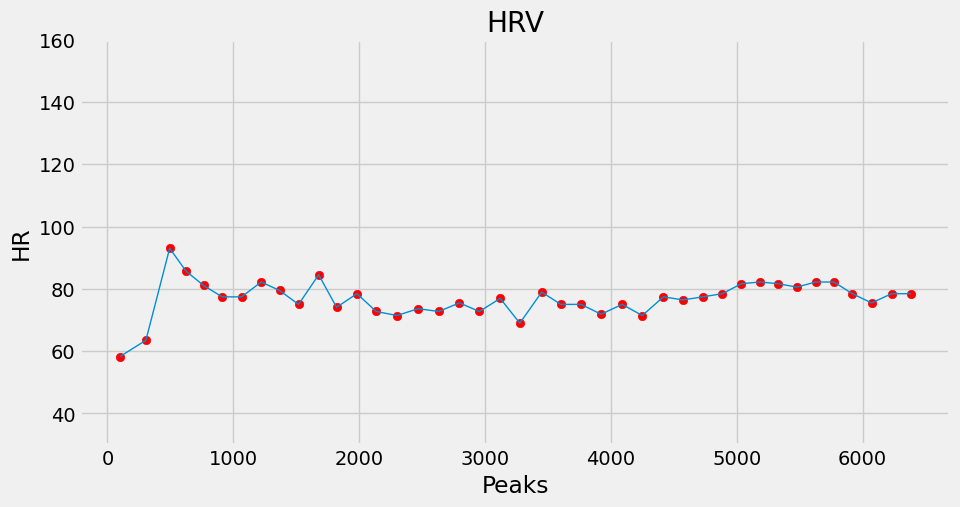

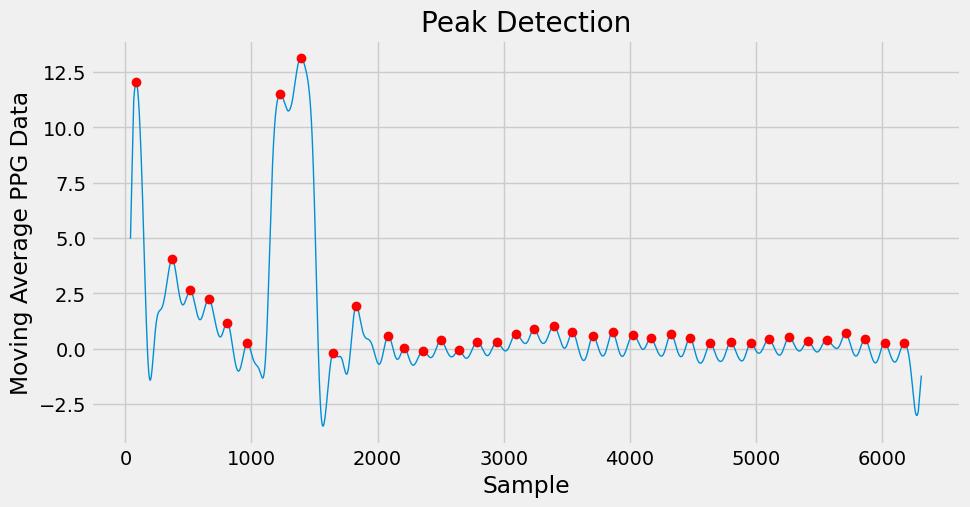

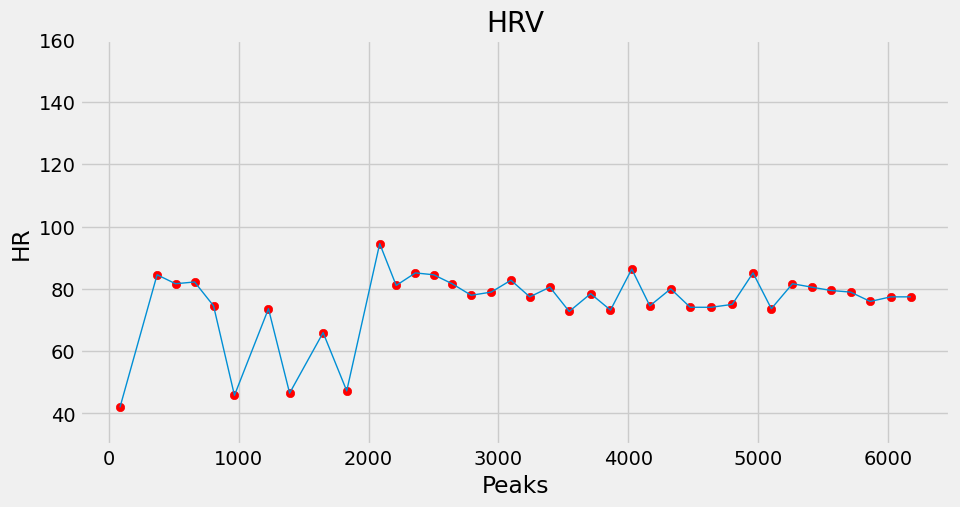

In [8]:
#Measure Heart Rate For Raw CSV File.
# hr = measureHeartRate(CSV_FILE_PATH, plot_save = False, no_skip_rows=15)
# print(f"{CSV_FILE_PATH} -> HeartRate: {hr}")
# Measaure Heart Rate For All Valid CSV Files 
for valid_csv_file in valid_csv_files:
    try:
        hr = measureHeartRate(valid_csv_file, plot_save = True)
    except:
        hr = "Error"
    print(f"{valid_csv_file} -> HeartRate: {hr}")
# print("HeartRate: ", measureHeartRate('2023-05-10-001S-22-05-32-S.csv'))
